In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns


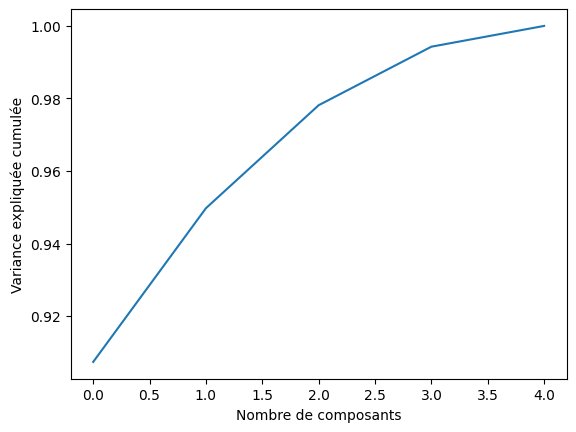

In [5]:
#in this cell we've tried to define the exact n_components value
# Load the dataset
df = pd.read_csv('countries.csv', encoding='iso-8859-1',usecols=['Carbon Footprint','Cropland Footprint', 'Grazing Footprint','Forest Footprint','Fish Footprint'])
#Replace null values

df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()
pca = PCA().fit(df)

# Tracer la variance expliquée par chaque composant principal
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.show()

In [6]:
features = ['Cropland Footprint', 'Grazing Footprint','Forest Footprint','Fish Footprint']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Carbon Footprint']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [8]:
finalDf = pd.concat([principalDf, df[['Carbon Footprint']]], axis = 1)

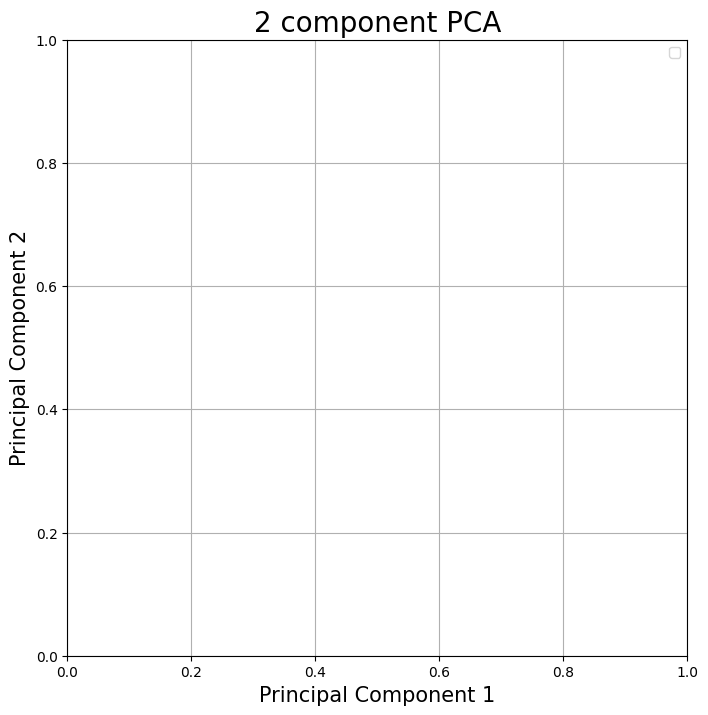

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

carbons = []
colors = ['r', 'g', 'b']
for carbon, color in zip(carbons,colors):
    indicesToKeep = finalDf['Carbon Footprint'] == carbon
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(carbons)
ax.grid()

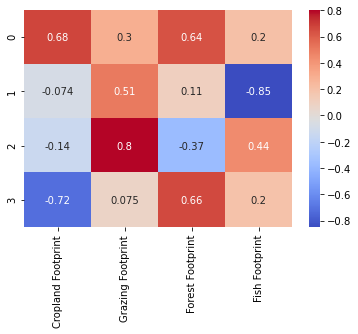

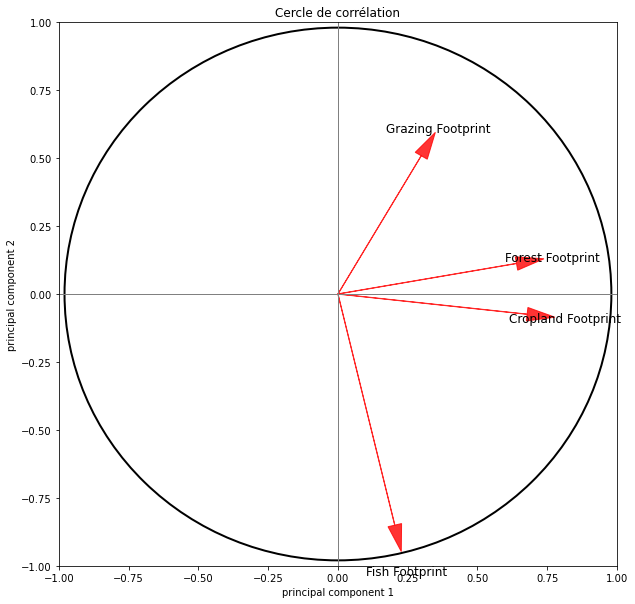

In [ ]:
# Convert input data to DataFrame
df = pd.DataFrame(x, columns=['Cropland Footprint', 'Grazing Footprint','Forest Footprint','Fish Footprint'])

# Fit PCA
pca = PCA()
pca.fit(x)

# Create correlation matrix and plot heatmap
correlation_matrix = pd.DataFrame(pca.components_, columns=df.columns)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Create correlation circle plot
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.axhline(0, color='gray', linewidth=1)
ax.axvline(0, color='gray', linewidth=1)
for i, v in enumerate(pca.components_.T):
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, color='red', alpha=0.8)
    ax.text(v[0]* 1.2, v[1] * 1.2, df.columns[i], color='black', ha='center', va='center', fontsize=12)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Cercle de corrélation')
# Add a circle to the plot
circle = plt.Circle((0, 0), radius=0.98, fill=False, edgecolor='black', linewidth=2)
ax.add_artist(circle)

plt.show()